In [1]:
# Enable auto-reload of modules
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import random

from gridworld import GridWorld
from qlearning_agent import QLearningAgent
from experiments import *

# Import your modules
from gridworld import GridWorld
from qlearning_agent import QLearningAgent
from experiments import (
    experiment_learning_rate,
    experiment_discount_factor,
    experiment_exploration_rate,
    experiment_convergence,
    experiment_trap_penalty,
    analyze_trap_qvalues,
    visualize_gamma_policies
)

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

print("✓ All modules imported successfully!")


✓ All modules imported successfully!


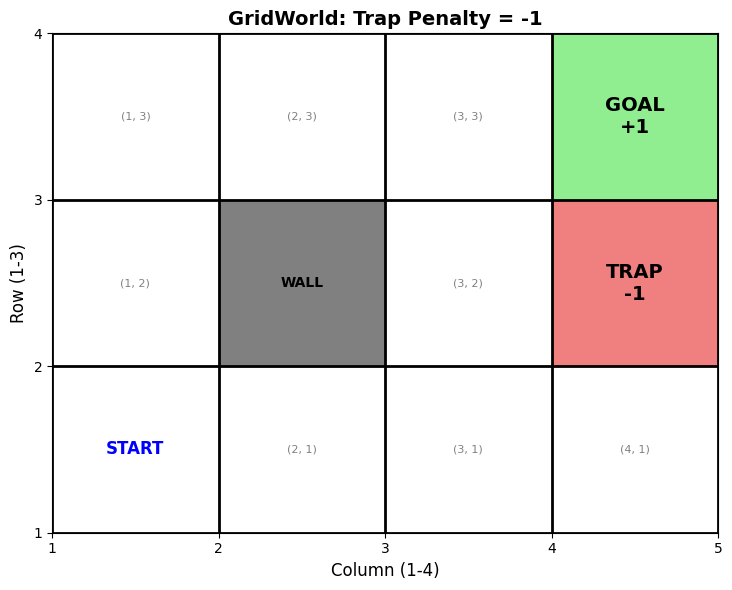

In [281]:
# Create environment
env = GridWorld(trap_penalty=-1)
env.visualize_grid()



Agent created successfully!
Q-table initialized with 9 states
ONLINE Q-LEARNING TRAINING
Hyperparameters: α=0.1, γ=0.99, ε=0.1
Training for 1000 episodes...

Episode  100: Avg Reward (last 100) =   0.367
Episode  200: Avg Reward (last 100) =   0.558
Episode  300: Avg Reward (last 100) =   0.551
Episode  400: Avg Reward (last 100) =   0.599
Episode  500: Avg Reward (last 100) =   0.372
Episode  600: Avg Reward (last 100) =   0.425
Episode  700: Avg Reward (last 100) =   0.709
Episode  800: Avg Reward (last 100) =   0.660
Episode  900: Avg Reward (last 100) =   0.709
Episode 1000: Avg Reward (last 100) =   0.729

✓ Training Complete!


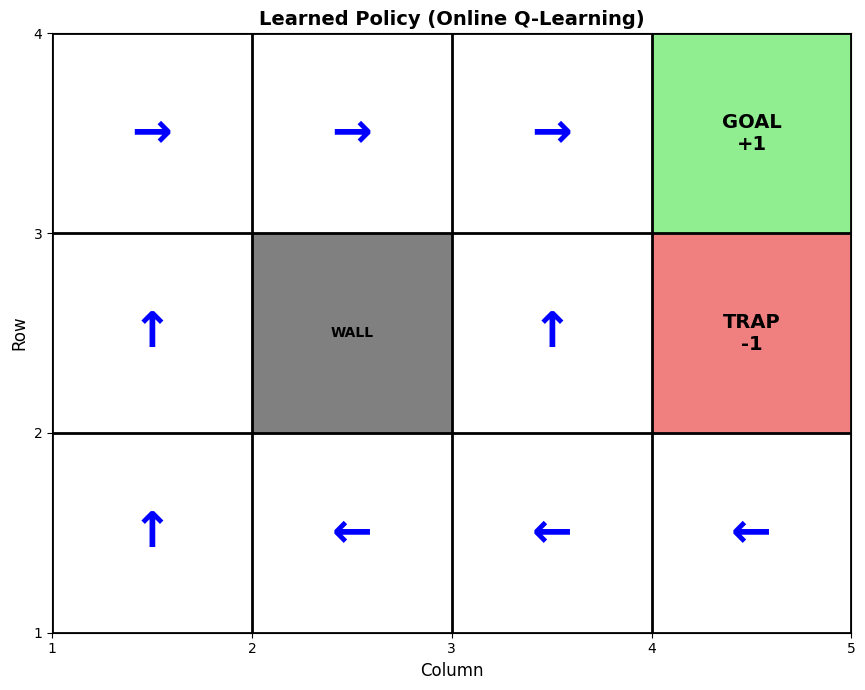

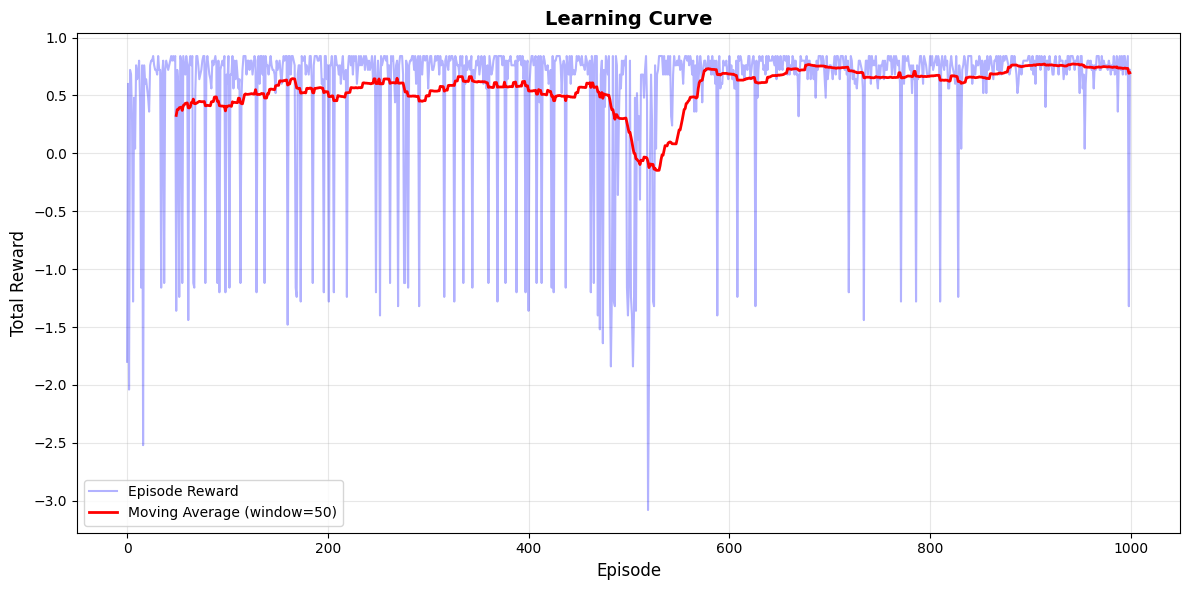

In [310]:
# Create agent with default hyperparameters
agent = QLearningAgent(env, alpha=0.1, gamma=0.99, epsilon=0.1)
print("Agent created successfully!")
print(f"Q-table initialized with {len(agent.Q)} states")
# Train for 1000 episodes
rewards = agent.train(num_episodes=1000, verbose=True)
# Show the policy with arrows
agent.visualize_policy()
# Show how rewards improved over time
agent.plot_learning_curve(rewards)

In [314]:
# Check Q-values for state (3,2) - next to the trap
agent.visualize_q_values((3, 2))

# Check another state
agent.visualize_q_values((1, 1))  # Start state


Q-values for state (3, 2):
----------------------------------------
  Up     (action 0):   0.6717
  Right  (action 1):  -0.7831
  Down   (action 2):   0.0253
  Left   (action 3):   0.3342

Best action: Up

Q-values for state (1, 1):
----------------------------------------
  Up     (action 0):   0.7216
  Right  (action 1):   0.5207
  Down   (action 2):   0.6119
  Left   (action 3):   0.5988

Best action: Up


In [317]:
# Get the complete policy dictionary
policy = agent.get_policy()
print("\nLearned Policy:")
print("="*40)
for state in sorted(policy.keys()):
    action = policy[state]
    action_name = env.action_names[action]
    print(f"State {state}: {action_name}")


Learned Policy:
State (1, 1): Up
State (1, 2): Up
State (1, 3): Right
State (2, 1): Left
State (2, 3): Right
State (3, 1): Left
State (3, 2): Up
State (3, 3): Right
State (4, 1): Left


In [319]:
# Run Experiment 1: Learning Rate
rewards_dict, agents_dict = experiment_learning_rate(env)

EXPERIMENT 1: EFFECT OF LEARNING RATE (α)

Training with α=0.01...
  Final avg reward: 0.7364

Training with α=0.1...
  Final avg reward: 0.7152

Training with α=0.5...
  Final avg reward: 0.5992

Training with α=1.0...
  Final avg reward: 0.5020



--- Policy with α=0.01 ---


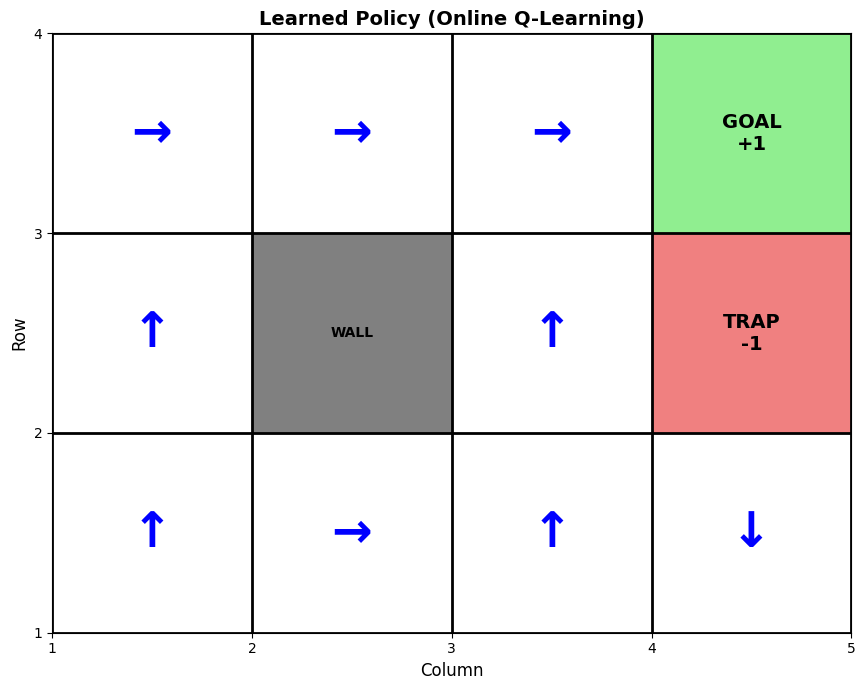


--- Policy with α=0.1 ---


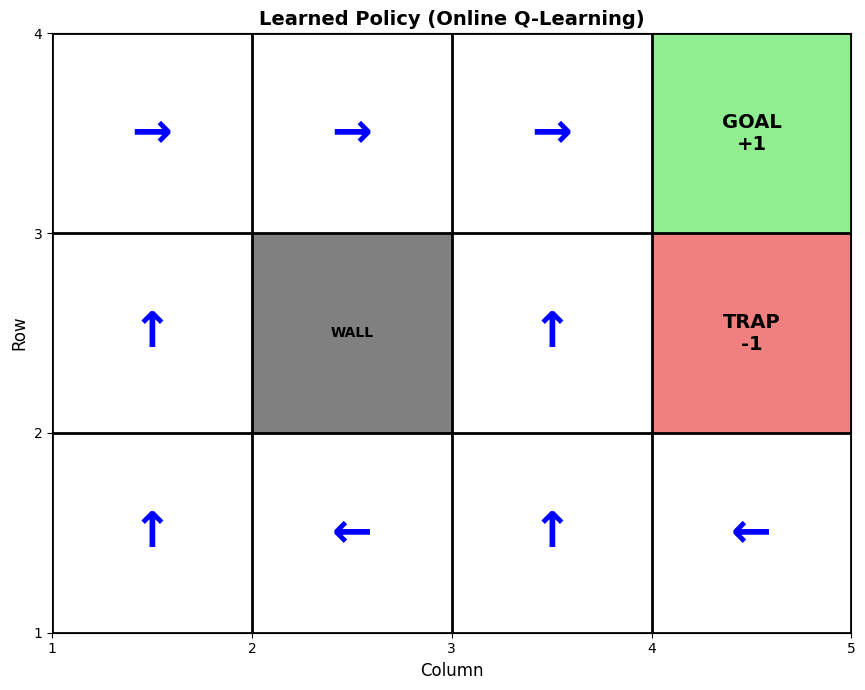


--- Policy with α=0.5 ---


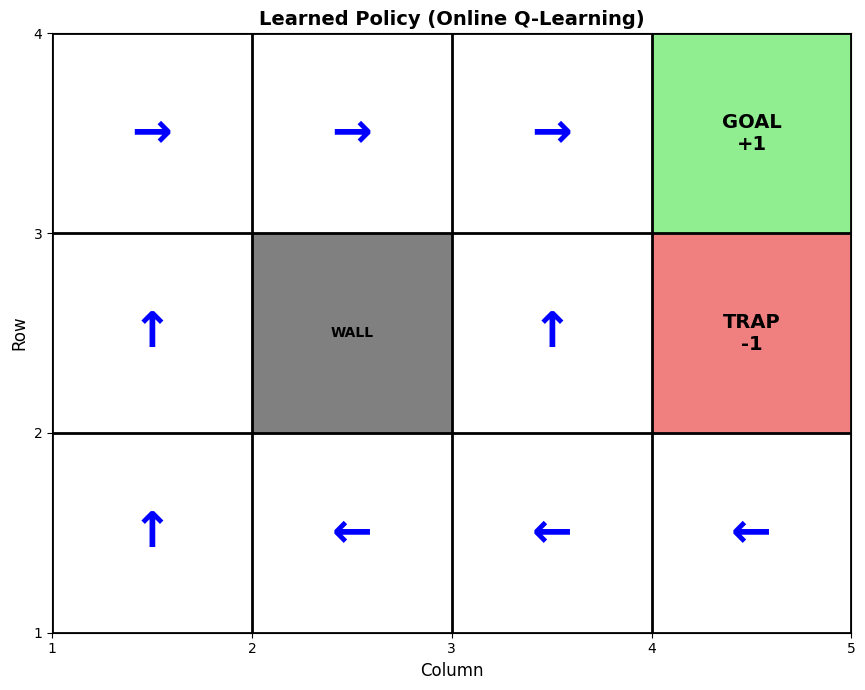


--- Policy with α=1.0 ---


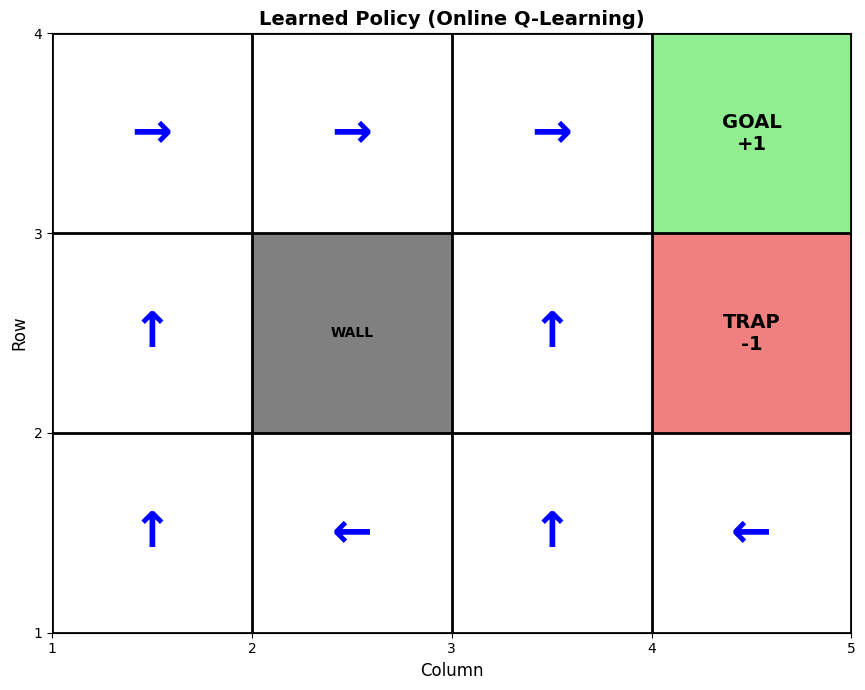

In [322]:
# Visualize policy learned with each alpha
for alpha in [0.01, 0.1, 0.5, 1.0]:
    print(f"\n--- Policy with α={alpha} ---")
    agents_dict[alpha].visualize_policy()

ANALYSIS: Q-VALUES AT STATE (3,2) - NEXT TO TRAP
State (3,2) is directly left of the trap (4,2)
Action 'Right' leads to trap with 80% probability

α = 0.01:
----------------------------------------
  Up    :   0.6783
  Right :  -0.0860  ← TRAP!
  Down  :  -0.0020
  Left  :   0.0210
  Best action: Up

α = 0.1:
----------------------------------------
  Up    :   0.6518
  Right :  -0.6328  ← TRAP!
  Down  :  -0.0046
  Left  :   0.3146
  Best action: Up

α = 0.5:
----------------------------------------
  Up    :   0.7422
  Right :  -0.9989  ← TRAP!
  Down  :   0.3348
  Left  :   0.3719
  Best action: Up

α = 1.0:
----------------------------------------
  Up    :   0.5219
  Right :  -1.0000  ← TRAP!
  Down  :  -1.0000
  Left  :   0.0486
  Best action: Up


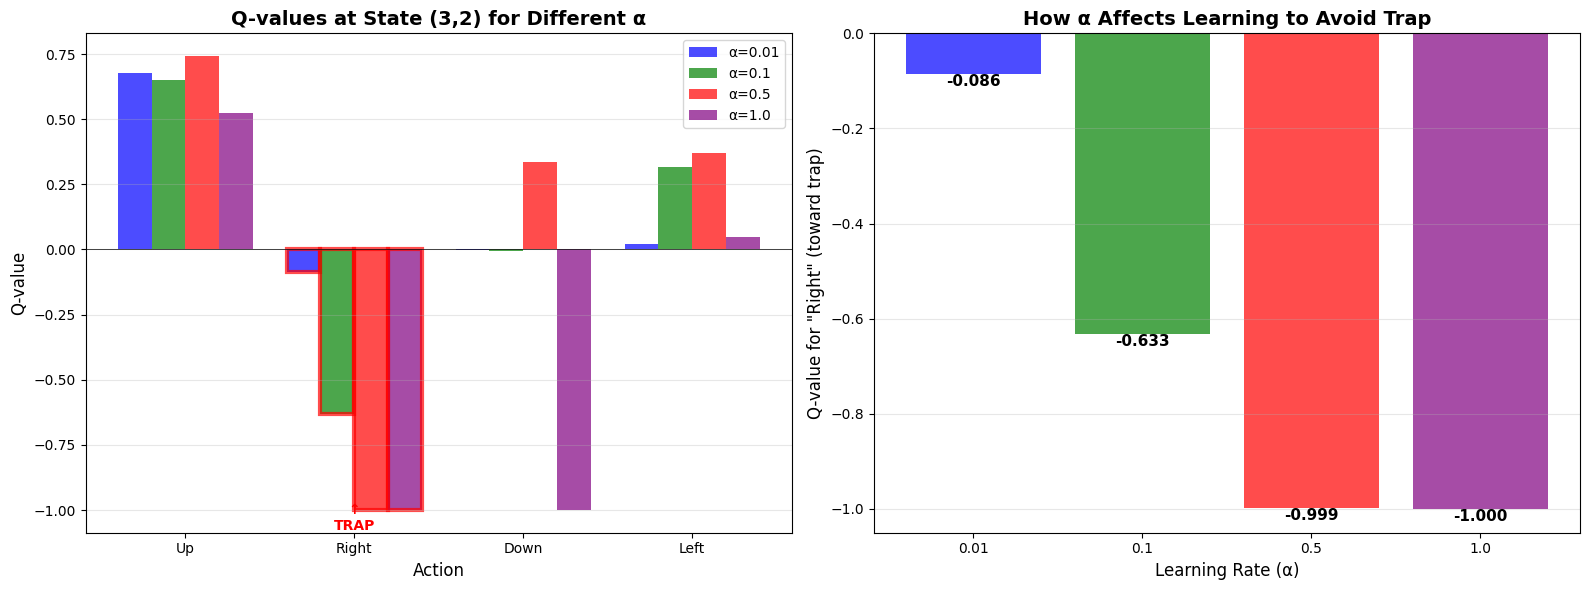


POLICY COMPARISON AT STATE (3,2):
α=0.01: Chooses Up     [SAFE]
α= 0.1: Chooses Up     [SAFE]
α= 0.5: Chooses Up     [SAFE]
α= 1.0: Chooses Up     [SAFE]


In [327]:
# Reload experiments module
import sys
if 'experiments' in sys.modules:
    del sys.modules['experiments']

from experiments import *

# Now this should work:
analyze_trap_qvalues(agents_dict, env)

 Experiment 2: Effect of Discount Factor (γ)
 Test how different discount factors affect the agent's planning horizon

EXPERIMENT 2: EFFECT OF DISCOUNT FACTOR (γ)

Training with γ=0.5...
  Final avg reward: 0.6516

Training with γ=0.8...
  Final avg reward: 0.6760

Training with γ=0.95...
  Final avg reward: 0.7324

Training with γ=0.99...
  Final avg reward: 0.7432

VISUALIZING POLICIES FOR DIFFERENT γ VALUES


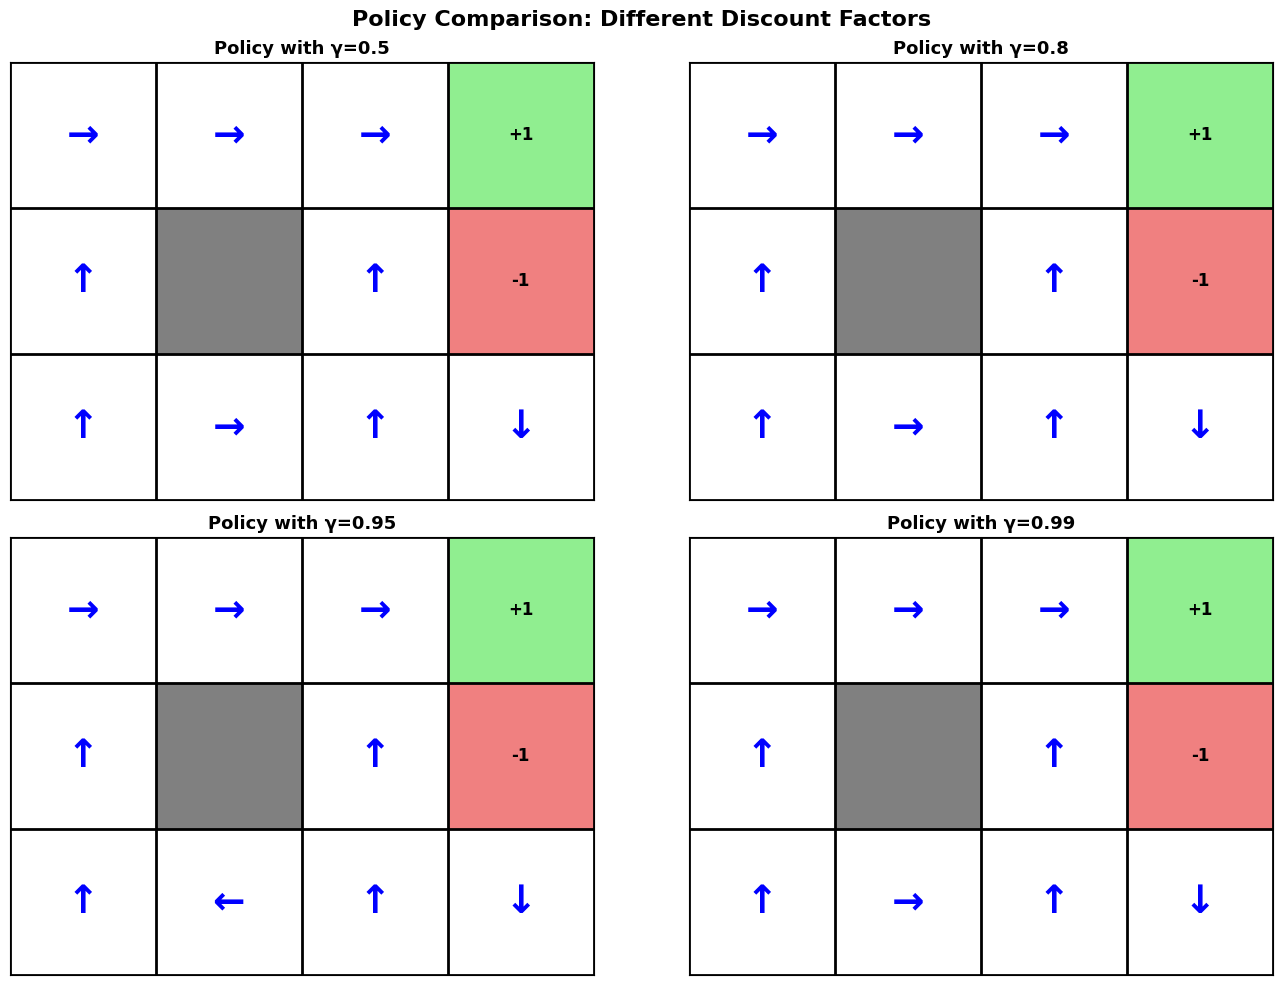

In [328]:
# Run Experiment 2: Discount Factor
rewards_dict_gamma, agents_dict_gamma = experiment_discount_factor(env)
visualize_gamma_policies(agents_dict_gamma, env)

 Experiment 3: Effect of Exploration Rate (ε)
Test how different exploration rates affect learning

EXPERIMENT 3: EFFECT OF EXPLORATION RATE (ε)

Training with ε=0.0...
  Final avg reward: 0.7052

Training with ε=0.1...
  Final avg reward: 0.6760

Training with ε=0.3...
  Final avg reward: 0.5584

Training with ε=0.5...
  Final avg reward: 0.3284

VISUALIZING POLICIES FOR DIFFERENT ε VALUES


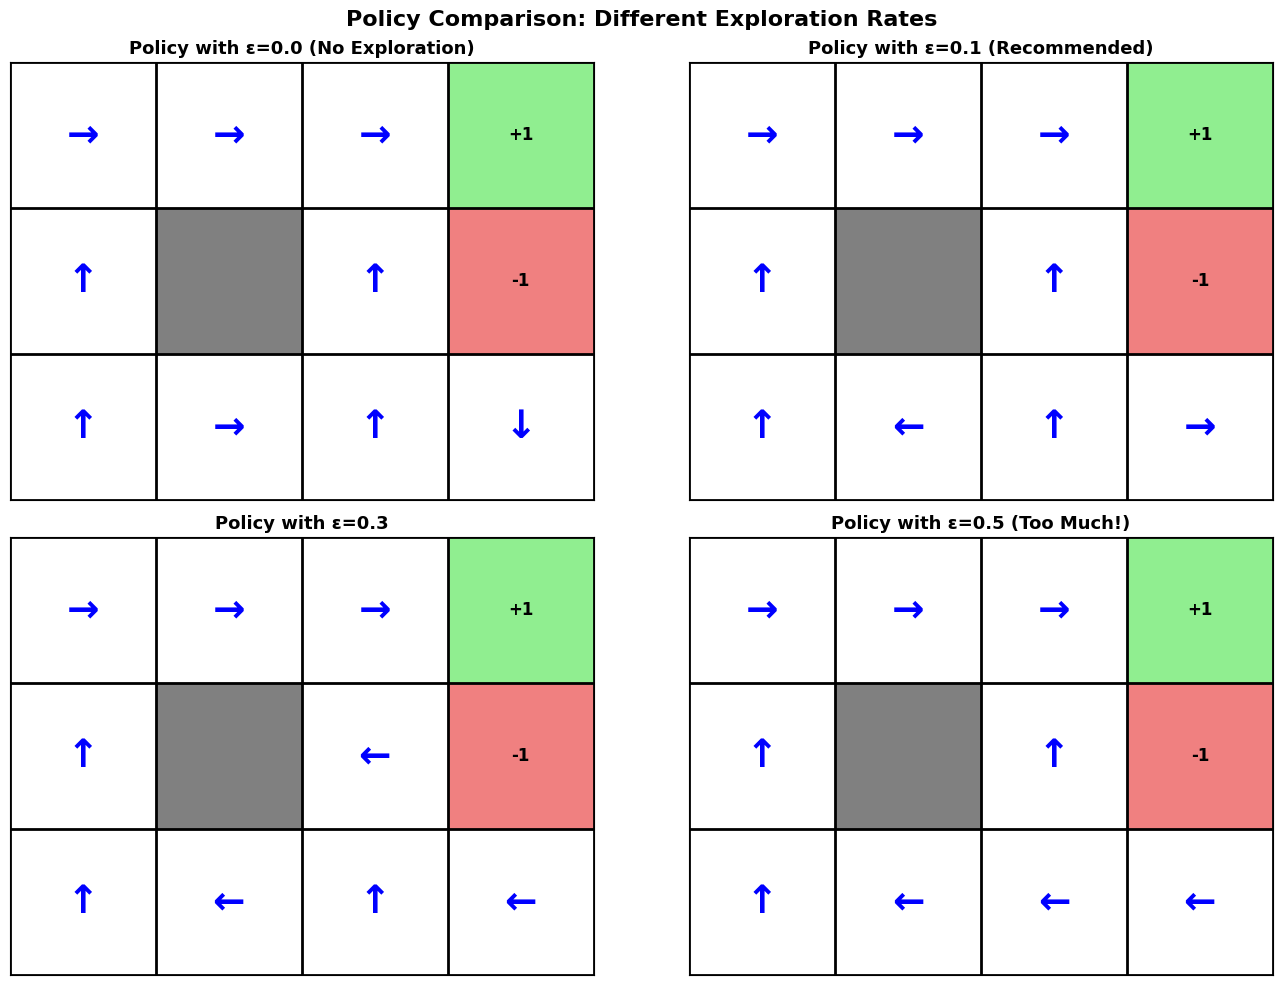

In [329]:
# Run Experiment 3: Exploration Rate
rewards_dict_epsilon, agents_dict_epsilon = experiment_exploration_rate(env)
# Compare policies visually
compare_epsilon_policies(agents_dict_epsilon, env)

EXPERIMENT 4: Q-VALUE vs POLICY CONVERGENCE
Tracking changes in Q-values and policy over 2000 episodes
Parameters: α=0.1, γ=0.99, ε=0.1

Training for 2000 episodes...
Tracking convergence every 10 episodes...

Episode  200: Q-change=0.010280, Policy changes=0
Episode  400: Q-change=0.012918, Policy changes=0
Episode  600: Q-change=0.015853, Policy changes=1
Episode  800: Q-change=0.003991, Policy changes=0
Episode 1000: Q-change=0.006240, Policy changes=0
Episode 1200: Q-change=0.003889, Policy changes=0
Episode 1400: Q-change=0.002265, Policy changes=0
Episode 1600: Q-change=0.004676, Policy changes=0
Episode 1800: Q-change=0.007354, Policy changes=0
Episode 2000: Q-change=0.005180, Policy changes=0

✓ Training complete!

Generating convergence plots...


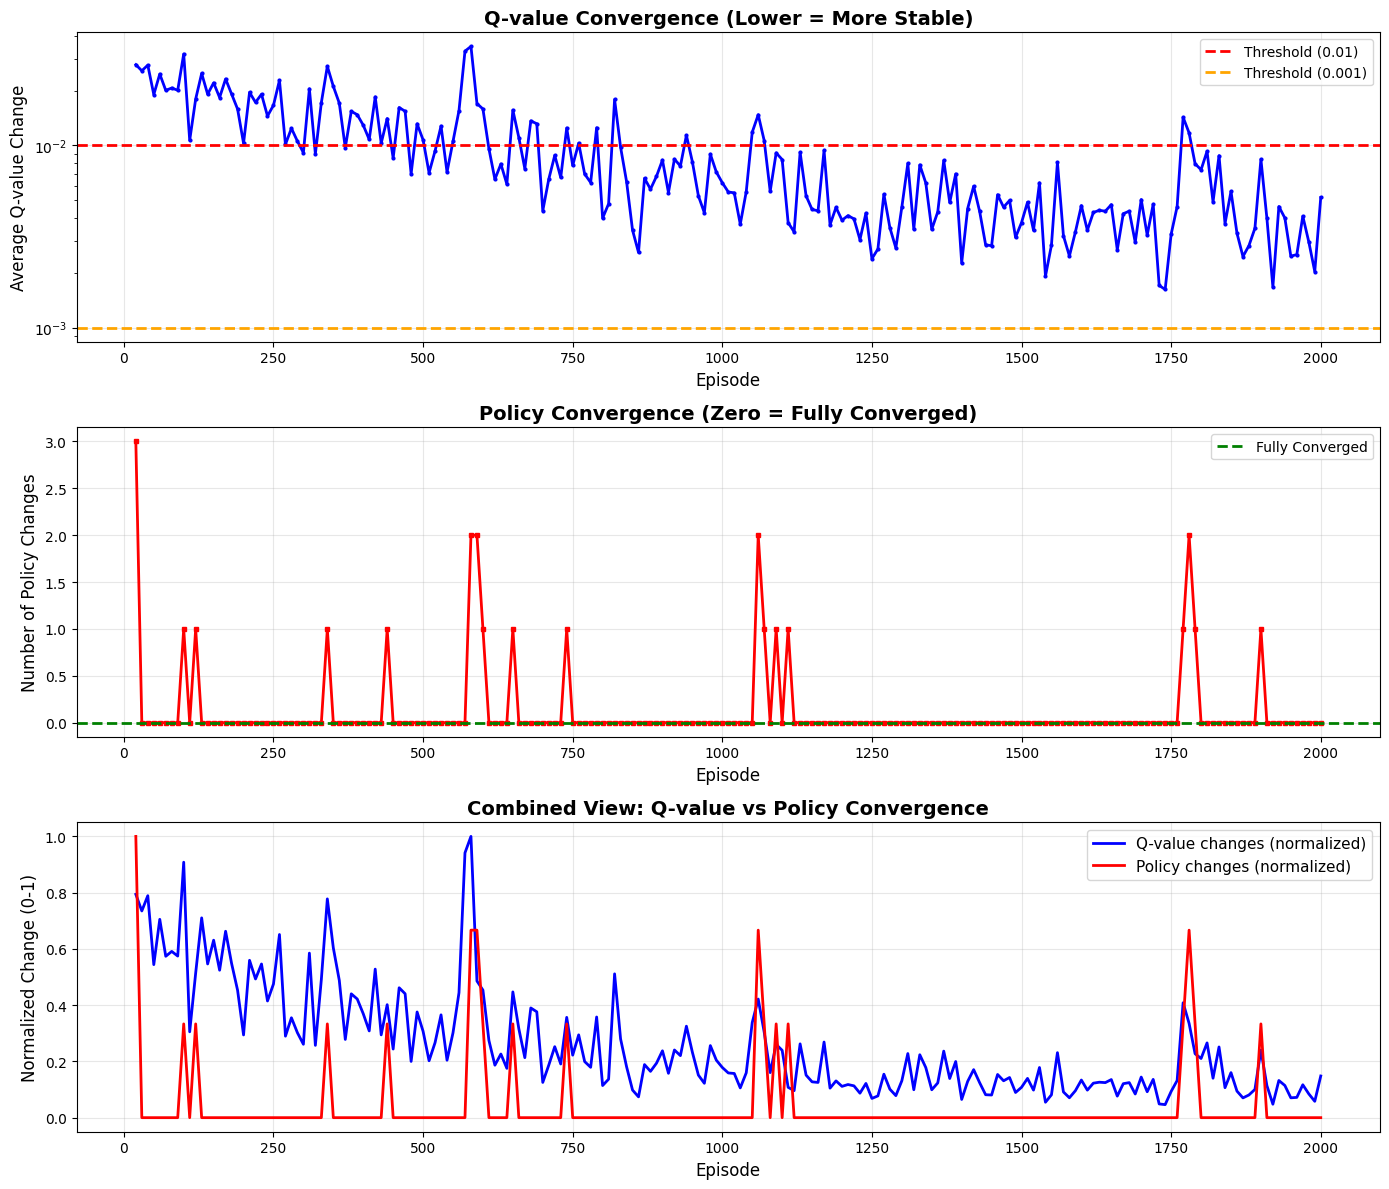


CONVERGENCE ANALYSIS:

✓ POLICY converged at episode: 130
  (Reached 0 changes and remained stable)

✓ Q-VALUES stabilized (change < 0.01) at episode: 300
✗ Q-VALUES did not stabilize to < 0.001

ANSWER TO QUESTION 2:

→ POLICY CONVERGED FIRST! ✓

  Policy converged at:  Episode 130
  Q-values stable at:   Episode 300
  Difference:           170 episodes
  (1, 3): Right  (2, 3): Right  (3, 3): Right  (4, 3): GOAL
  (1, 2): Up  (2, 2): WALL  (3, 2): Up  (4, 2): TRAP
  (1, 1): Up  (2, 1): Left  (3, 1): Left  (4, 1): Left


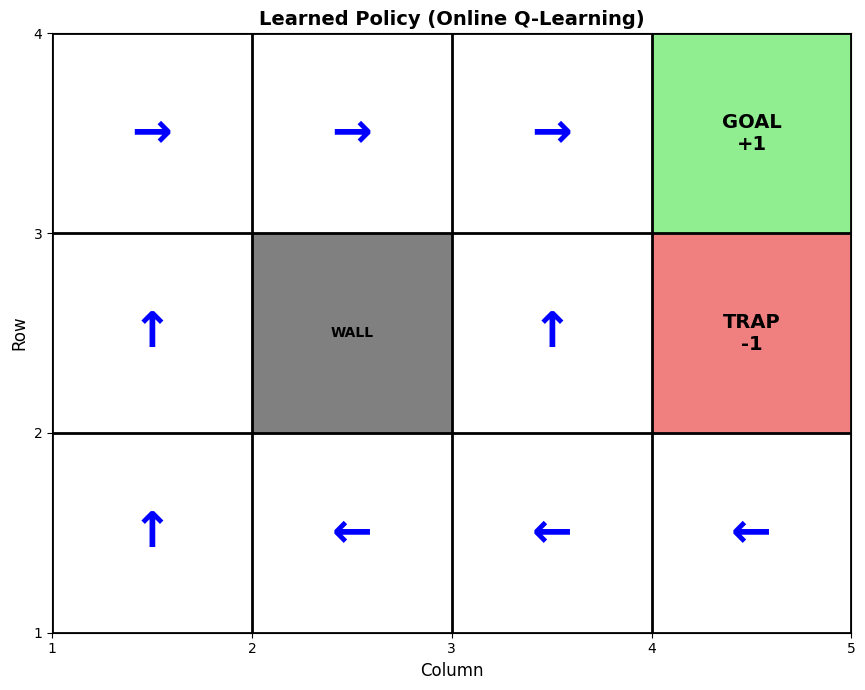

In [330]:
# Run Experiment 4: Convergence Analysis
agent, q_changes, policy_changes, episodes = experiment_convergence_analysis(env)


Environment with trap penalty = -200:


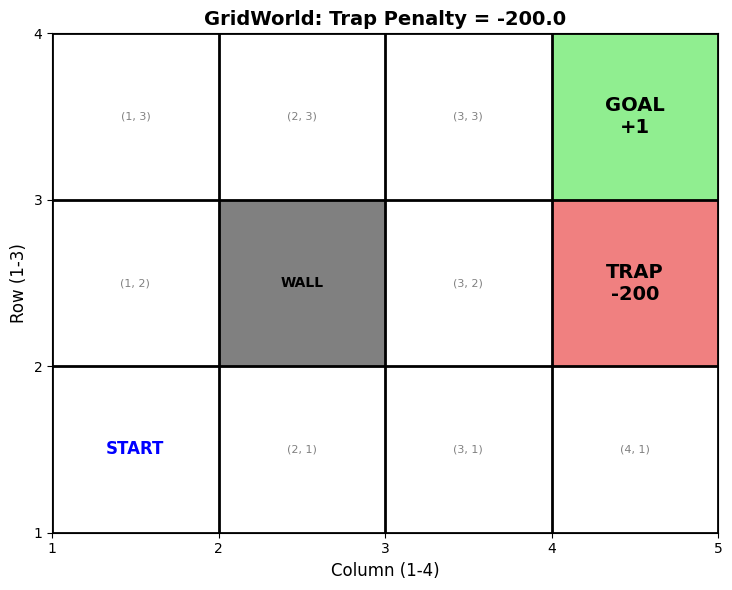

In [2]:

# Create environment with large penalty (-200)
env_large = GridWorld(trap_penalty=-200.0)
print("\nEnvironment with trap penalty = -200:")
env_large.visualize_grid()

Agent created successfully!
Q-table initialized with 9 states
ONLINE Q-LEARNING TRAINING
Hyperparameters: α=0.1, γ=0.99, ε=0.1
Training for 1000 episodes...

Episode  100: Avg Reward (last 100) = -19.482
Episode  200: Avg Reward (last 100) =  -3.308
Episode  300: Avg Reward (last 100) =   0.720
Episode  400: Avg Reward (last 100) =  -7.370
Episode  500: Avg Reward (last 100) =  -5.299
Episode  600: Avg Reward (last 100) =  -1.301
Episode  700: Avg Reward (last 100) =   0.662
Episode  800: Avg Reward (last 100) =  -3.326
Episode  900: Avg Reward (last 100) =  -5.307
Episode 1000: Avg Reward (last 100) =   0.747

✓ Training Complete!


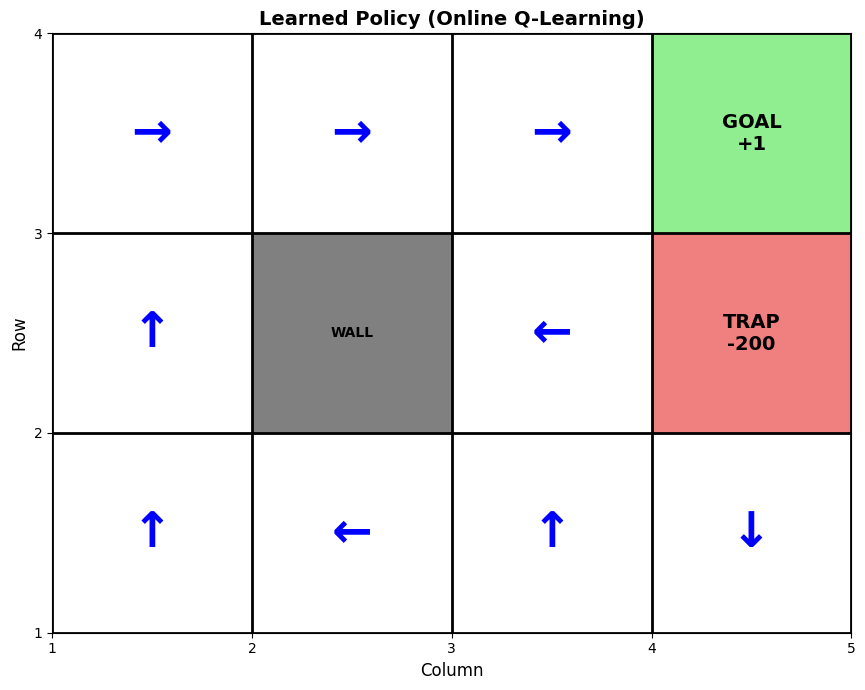

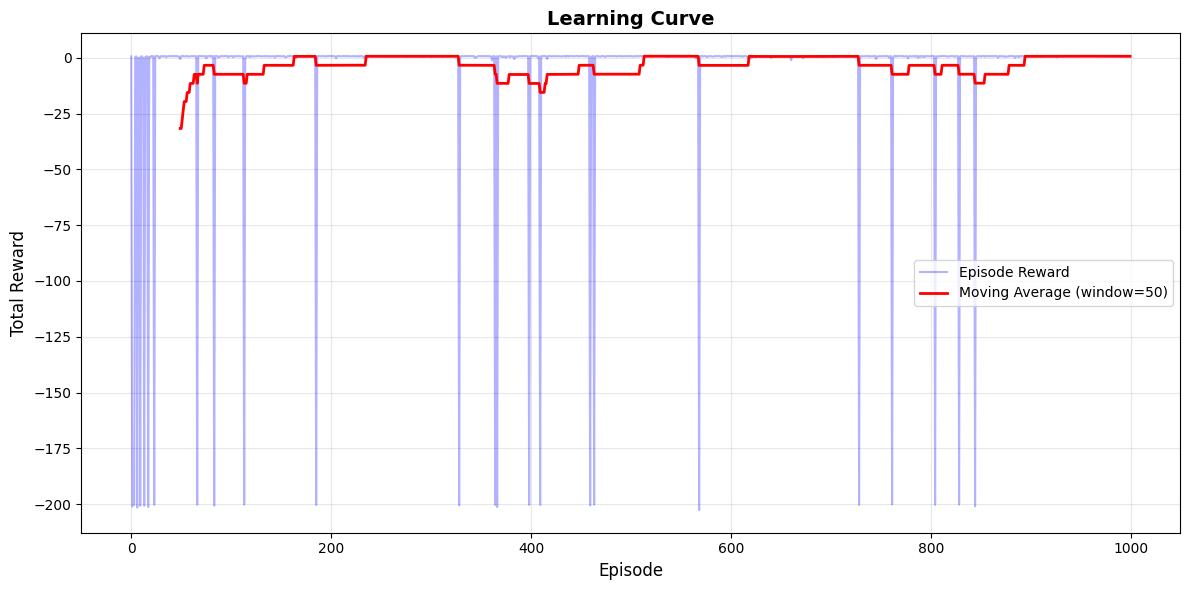

In [3]:
# Create agent with default hyperparameters
agent = QLearningAgent(env_large, alpha=0.1, gamma=0.99, epsilon=0.1)
print("Agent created successfully!")
print(f"Q-table initialized with {len(agent.Q)} states")
# Train for 1000 episodes
rewards = agent.train(num_episodes=1000, verbose=True)
# Show the policy with arrows
agent.visualize_policy()
# Show how rewards improved over time
agent.plot_learning_curve(rewards)